In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
file_path = "US_Accidents_March23_sampled_500k.csv"  # Change this to your actual file path
df = pd.read_csv(file_path, low_memory=False)

# Convert 'Start_Time' to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Filter for the year 2020 and Counties = 'Los Angeles', 'Orange', 'San Diego' and State = 'CA'
df_2020_CA = df[(df['Start_Time'].dt.year == 2022) & 
                (df['County'].isin(['Los Angeles', 'Orange', 'San Diego'])) & 
                (df['State'] == 'CA')]

# Create a 'Date' column
df_2020_CA['Date'] = df_2020_CA['Start_Time'].dt.date

# Count the number of accidents per day
accidents_per_day = df_2020_CA.groupby('Date').size()

# Plot the histogram using a bar chart
plt.figure(figsize=(12, 6), facecolor = 'white')
plt.bar(accidents_per_day.index, accidents_per_day.values, width=1, edgecolor='black')

# Formatting the x-axis with proper date labels
plt.xlabel('Date (2022)')
plt.ylabel('Number of Accidents')
plt.title('Number of Traffic Accidents Per Day in LA, Orange, and SD Counties')

# Adjust x-axis tick frequency
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<Figure size 1200x600 with 1 Axes>

In [47]:
df_subset = df[df['County'].isin(['San Diego', 'Orange', 'Los Angeles'])][['Severity', 'Visibility(mi)']].copy()

In [48]:
Q1 = df_subset['Visibility(mi)'].quantile(0.25)
Q3 = df_subset['Visibility(mi)'].quantile(0.75)
IQR = Q3 - Q1

df_filtered = df_subset[(df_subset['Visibility(mi)'] >= Q1 - 1.5 * IQR) & 
                        (df_subset['Visibility(mi)'] <= Q3 + 1.5 * IQR)]

Text(0, 0.5, 'Visibility(mi)')

<Figure size 2000x1200 with 0 Axes>

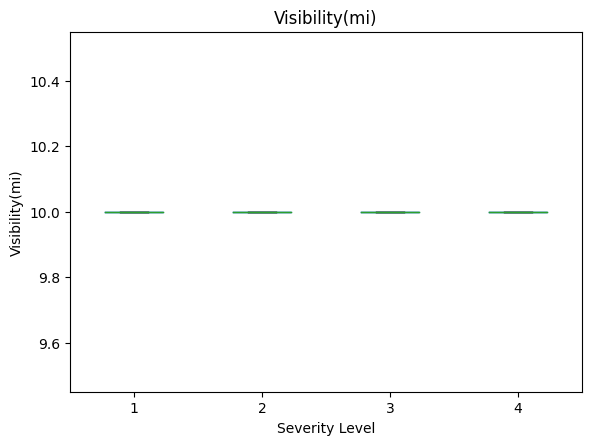

In [49]:
plt.style.use('default')
plt.figure(figsize=(20, 12), facecolor = 'white')
df_filtered.boxplot(column='Visibility(mi)', by='Severity', grid=False, showfliers=False)

# Customize plot labels
plt.suptitle("")  # Remove default boxplot title
plt.xlabel("Severity Level")
plt.ylabel("Visibility(mi)")

In [24]:
import pandas as pd
import numpy as np
df = pd.read_csv('~/Desktop/cbg_processed3.csv')

In [32]:
print(df.columns.tolist())
print(df.head())

['my_index', 'Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr', 'TotPop', 'CountHU', 'HH', 'P_WrkAge', 'AutoOwn0', 'Pct_AO0', 'AutoOwn1', 'Pct_AO1', 'AutoOwn2p', 'Pct_AO2p', 'Workers', 'R_LowWageWk', 'R_MedWageWk', 'R_HiWageWk', 'R_PCTLOWWAGE', 'TotEmp', 'E5_Ret', 'E5_Off', 'E5_Ind', 'E5_Svc', 'E5_Ent', 'E8_Ret', 'E8_off', 'E8_Ind', 'E8_Svc', 'E8_Ent', 'E8_Ed', 'E8_Hlth', 'E8_Pub', 'E_LowWageWk', 'E_MedWageWk', 'E_HiWageWk', 'E_PctLowWage', 'D1A', 'D1B', 'D1C', 'D1C5_RET', 'D1C5_OFF', 'D1C5_IND', 'D1C5_SVC', 'D1C5_ENT', 'D1C8_RET', 'D1C8_OFF', 'D1C8_IND', 'D1C8_SVC', 'D1C8_ENT', 'D1C8_ED', 'D1C8_HLTH', 'D1C8_PUB', 'D1D', 'D1_FLAG', 'D2A_JPHH', 'D2B_E5MIX', 'D2B_E5MIXA', 'D2B_E8MIX', 'D2B_E8MIXA', 'D2A_EPHHM', 'D2C_TRPMX1', 'D2C_TRPMX2', 'D2C_TRIPEQ', 'D2R_JOBPOP', 'D2R_WRKEMP', 'D2A_WRKEMP', 'D2C_WREMLX', 'D3A', 'D3AAO', 'D3AMM', 'D3APO', 'D3B', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025', 'D4B050', 'D5AR', 'D5AE', 'D5CR', 'D5CRI', 'D5CE', 'D5CEI', 'D2A_Ranked', 'D2B_Ranked', 

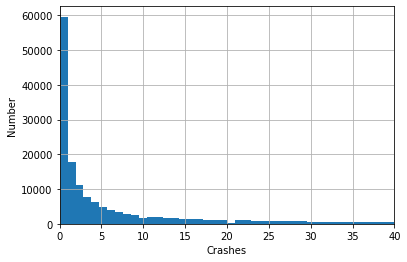

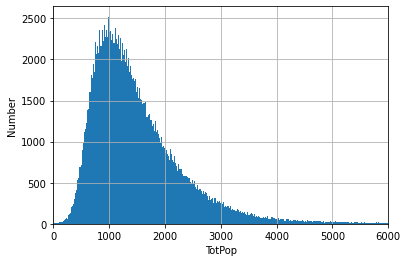

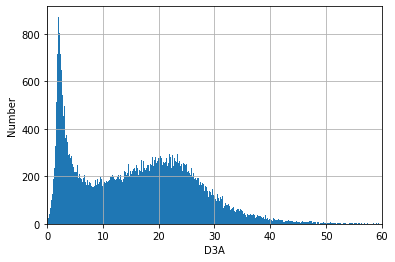

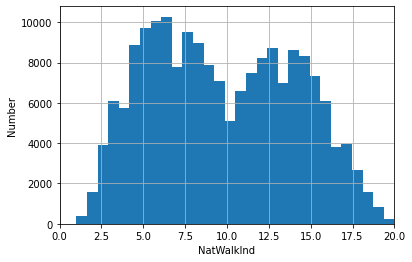

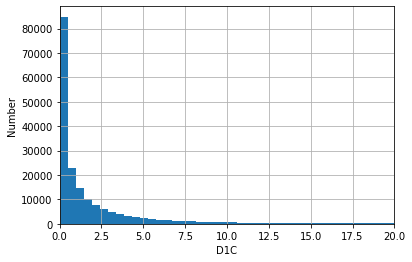

In [27]:
df['Crashes'].hist(bins=10000)
plt.xlim(0, 40)
plt.xlabel('Crashes')
plt.ylabel('Number')
plt.show()

df['TotPop'].hist(bins=3000)
plt.xlim(0, 6000)
plt.xlabel('TotPop')
plt.ylabel('Number')
plt.show()

df['D3A'].hist(bins=3000)
plt.xlim(0, 60)
plt.xlabel('D3A')
plt.ylabel('Number')
plt.show()

df['NatWalkInd'].hist(bins=30)
plt.xlim(0, 20)
plt.xlabel('NatWalkInd')
plt.ylabel('Number')
plt.show()

df['D1C'].hist(bins=5000)
plt.xlim(0, 20)
plt.xlabel('D1C')
plt.ylabel('Number')
plt.show()

In [39]:
print(df.columns.tolist())

['my_index', 'Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr', 'TotPop', 'CountHU', 'HH', 'P_WrkAge', 'AutoOwn0', 'Pct_AO0', 'AutoOwn1', 'Pct_AO1', 'AutoOwn2p', 'Pct_AO2p', 'Workers', 'R_LowWageWk', 'R_MedWageWk', 'R_HiWageWk', 'R_PCTLOWWAGE', 'TotEmp', 'E5_Ret', 'E5_Off', 'E5_Ind', 'E5_Svc', 'E5_Ent', 'E8_Ret', 'E8_off', 'E8_Ind', 'E8_Svc', 'E8_Ent', 'E8_Ed', 'E8_Hlth', 'E8_Pub', 'E_LowWageWk', 'E_MedWageWk', 'E_HiWageWk', 'E_PctLowWage', 'D1A', 'D1B', 'D1C', 'D1C5_RET', 'D1C5_OFF', 'D1C5_IND', 'D1C5_SVC', 'D1C5_ENT', 'D1C8_RET', 'D1C8_OFF', 'D1C8_IND', 'D1C8_SVC', 'D1C8_ENT', 'D1C8_ED', 'D1C8_HLTH', 'D1C8_PUB', 'D1D', 'D1_FLAG', 'D2A_JPHH', 'D2B_E5MIX', 'D2B_E5MIXA', 'D2B_E8MIX', 'D2B_E8MIXA', 'D2A_EPHHM', 'D2C_TRPMX1', 'D2C_TRPMX2', 'D2C_TRIPEQ', 'D2R_JOBPOP', 'D2R_WRKEMP', 'D2A_WRKEMP', 'D2C_WREMLX', 'D3A', 'D3AAO', 'D3AMM', 'D3APO', 'D3B', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025', 'D4B050', 'D5AR', 'D5AE', 'D5CR', 'D5CRI', 'D5CE', 'D5CEI', 'D2A_Ranked', 'D2B_Ranked', 

<AxesSubplot:>

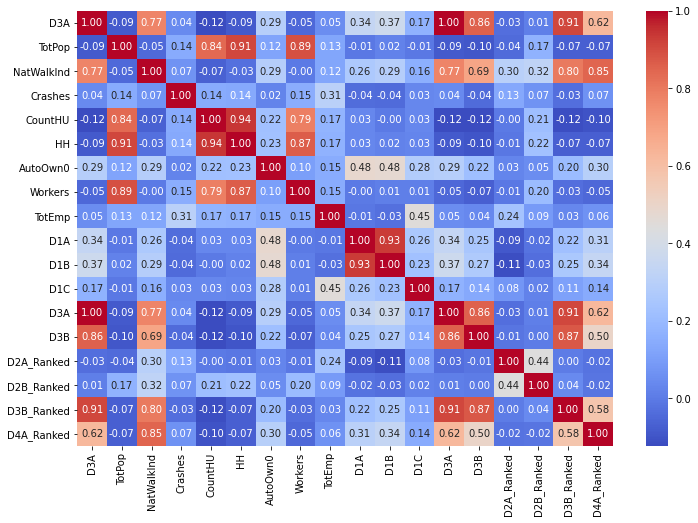

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[['D3A', 'TotPop', 'NatWalkInd', 'Crashes', 'CountHU', 'HH', 'AutoOwn0', 'Workers', 'TotEmp',
          'D1A', 'D1B','D1C', 'D3B', 'D2A_Ranked', 'D2B_Ranked', 'D3B_Ranked', 'D4A_Ranked']].corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", )

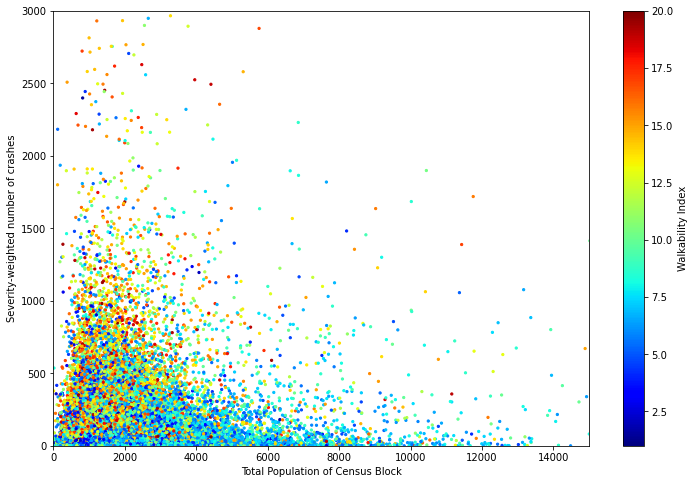

In [45]:
import matplotlib.pyplot as plt

'''
A scatter plot of the crashes vs. total population of the census block,
color-coded by the national walkability index
'''
plt.figure(figsize = (12,8))

plt.scatter(df['TotPop'], df['Crashes'], c = df['NatWalkInd'], s = 5, cmap = 'jet')
plt.colorbar(label='Walkability Index')
plt.xlabel('Total Population of Census Block')
plt.ylabel('Severity-weighted number of crashes')
plt.xlim(0,15000)
plt.ylim(0,3000)
plt.show()

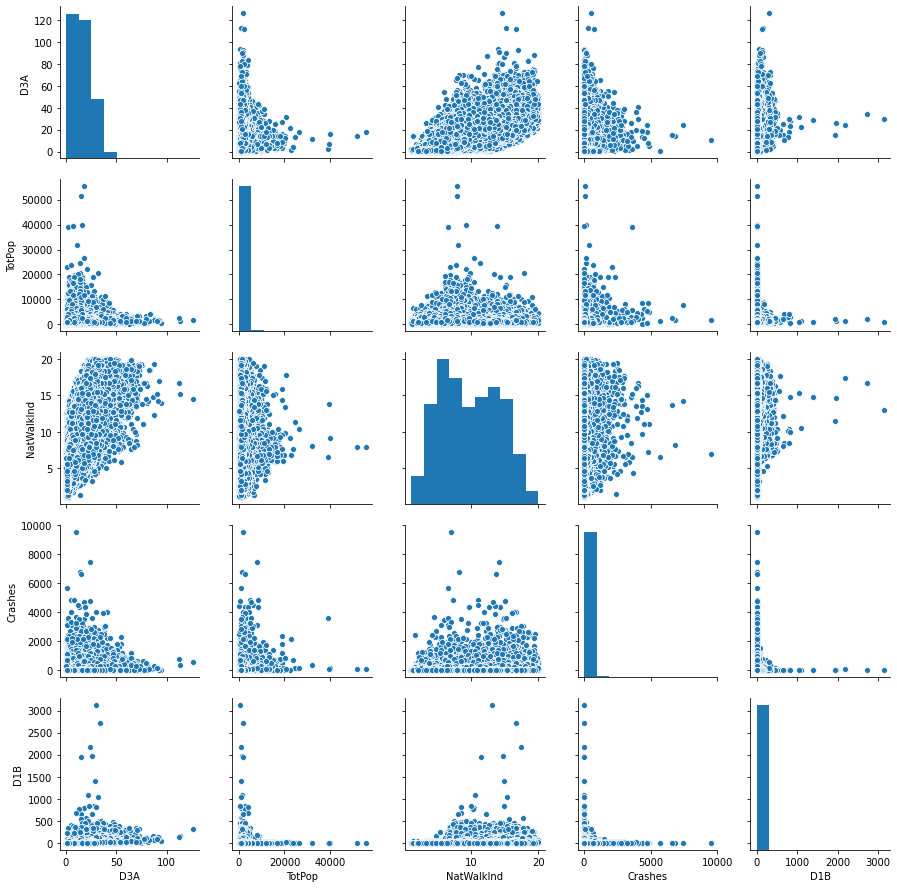

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace these with the actual names of your 4 columns
columns_to_plot = ['D3A', 'TotPop', 'NatWalkInd', 'Crashes', 'D1B']

# Create pairplot
sns.pairplot(df[columns_to_plot])
plt.show()

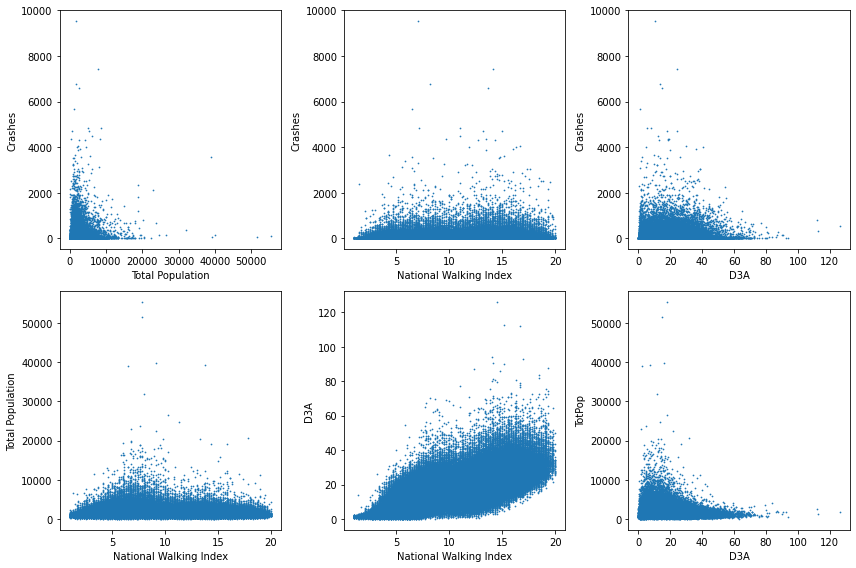

In [7]:
fig,ax = plt.subplots(2,3, figsize = (12,8))

ax[0,0].scatter(df['TotPop'],df['Crashes'], s = .5)
ax[0,0].set_xlabel('Total Population')
ax[0,0].set_ylabel('Crashes')

ax[1,0].scatter(df['NatWalkInd'],df['TotPop'], s = .5)
ax[1,0].set_xlabel('National Walking Index')
ax[1,0].set_ylabel('Total Population')

ax[0,1].scatter(df['NatWalkInd'],df['Crashes'], s = .5)
ax[0,1].set_xlabel('National Walking Index')
ax[0,1].set_ylabel('Crashes')

ax[1,1].scatter(df['NatWalkInd'],df['D3A'], s = .5)
ax[1,1].set_xlabel('National Walking Index')
ax[1,1].set_ylabel('D3A')

ax[0,2].scatter(df['D3A'],df['Crashes'], s = .5)
ax[0,2].set_xlabel('D3A')
ax[0,2].set_ylabel('Crashes')

ax[1,2].scatter(df['D3A'],df['TotPop'], s = .5)
ax[1,2].set_xlabel('D3A')
ax[1,2].set_ylabel('TotPop')

plt.tight_layout()

plt.show()

In [ ]:
sns.violinplot(x='', y='Crashes', data=df)
plt.show()